<a href="https://colab.research.google.com/github/rwpark99/Achilles/blob/master/KOSAIM_SummerSchool_2021_Handson_01_Classification_210814_jhyun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2021 KOSAIM Summer School

# Hands-on Session 1. Basic of  CNN - Classification

![alt text](https://adeshpande3.github.io/assets/Cover.png)

# 0. 시작에 앞서... 

Menu -> Runtime -> Change runtime type 

![gpu setting](https://raw.githubusercontent.com/mi2rl/datasets/master/gpu.png)


In [ ]:
!rm -rf *

# [1] 데이터 준비: MedNIST dataset


## 1.1. 데이터 다운로드

In [ ]:
# 데이터 다운로드
!wget https://raw.githubusercontent.com/mi2rl/datasets/master/mednist.tar.gz

--2021-08-13 16:54:05--  https://raw.githubusercontent.com/mi2rl/datasets/master/mednist.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62087736 (59M) [application/octet-stream]
Saving to: ‘mednist.tar.gz’

mednist.tar.gz      100%[===================>]  59.21M   233MB/s    in 0.3s    

2021-08-13 16:54:08 (233 MB/s) - ‘mednist.tar.gz’ saved [62087736/62087736]



In [ ]:
# 압축 풀기
!tar xzf mednist.tar.gz

## 1.2. 데이터 파악


/resized
1. /AbdomenCT
2. /BreastMRI
3. /CXR
4. /ChestCT
5. /Hand
6. /HeadCT


In [ ]:
# 패키지 불러오기
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
dataDir = 'resized' # 데이터 위치
classNames = sorted(os.listdir(dataDir)) # 각 클래스의 이름들
numClass = len(classNames)               # 클래스 개수

###
imageFiles = [[os.path.join(dataDir, classNames[i], x) for x in os.listdir(os.path.join(dataDir, classNames[i]))] 
              for i in range(numClass)]                   # 각 클래스별 파일 이름들
numEach = [len(imageFiles[i]) for i in range(numClass)]   # 각 클래스 별 파일 갯수

###
imageFilesList = [] # 모든 파일이름
imageClass = [] # 각각의 파일들에 대한 클래스
for i in range(numClass):
  imageFilesList.extend(imageFiles[i])
  imageClass.extend([i]*numEach[i])

### 
numTotal = len(imageClass) # 전체 파일 갯수
imageWidth, imageHeight = Image.open(imageFilesList[0]).size # 각 영상의 사이즈(width, height)

###
print("There are",numTotal,"images in",numClass,"distinct categories")
print("Label names:",classNames)
print("Label counts:",numEach)
print("Image dimensions:",imageWidth,"x",imageHeight)

There are 58954 images in 6 distinct categories
Label names: ['AbdomenCT', 'BreastMRI', 'CXR', 'ChestCT', 'Hand', 'HeadCT']
Label counts: [10000, 8954, 10000, 10000, 10000, 10000]
Image dimensions: 64 x 64


In [ ]:
# 이미지 리스트 살펴보기
imageFilesList[0:10]

['resized/AbdomenCT/002494.jpeg',
 'resized/AbdomenCT/003635.jpeg',
 'resized/AbdomenCT/002152.jpeg',
 'resized/AbdomenCT/000768.jpeg',
 'resized/AbdomenCT/004768.jpeg',
 'resized/AbdomenCT/002258.jpeg',
 'resized/AbdomenCT/007932.jpeg',
 'resized/AbdomenCT/002151.jpeg',
 'resized/AbdomenCT/003410.jpeg',
 'resized/AbdomenCT/005284.jpeg']

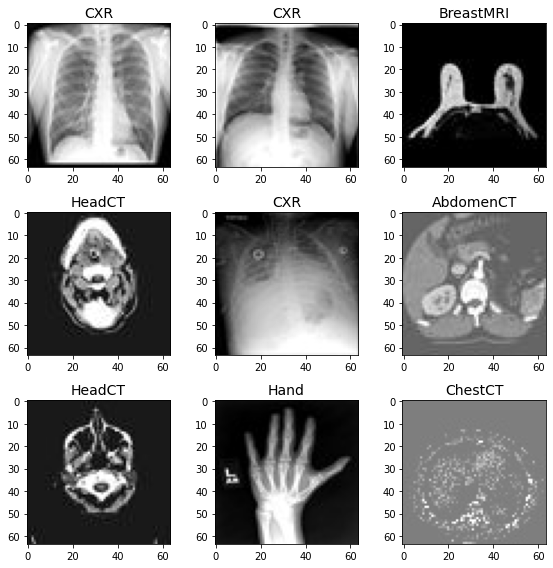

In [ ]:
# 전체 이미지 중 9개를 랜덤으로 골라 3x3으로 레이블과 함께 그리기
# -- 여러번 실행하며 이미지들을 살펴보세요 --

plt.subplots(3,3,figsize=(8,8))
for i,k in enumerate(np.random.randint(numTotal, size=9)): 
    im = Image.open(imageFilesList[k])                      
    arr = np.array(im)
    plt.subplot(3,3,i+1)
    plt.title(classNames[imageClass[k]], fontsize=14)
    plt.imshow(arr,cmap='gray',vmin=0,vmax=255)
plt.tight_layout()
plt.show()

# [2] VGG16를 이용한 분류 실습



![VGG16 네트워크 구조](https://www.cs.toronto.edu/~frossard/post/vgg16/vgg16.png)

In [ ]:
# 패키지 불러오기
import keras
from keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense
from keras.models import Model

## 2.1. [Quiz] 순서가 섞인 layer들을 VGG16 구성에 맞게 배치해보세요.

In [ ]:
inputs = Input(shape=(224, 224, 3,), name="VGGInput")

In [ ]:
x = Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu')(x)
x = Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu')(x)
x = Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu')(x)
x = MaxPool2D(padding='same')(x)

In [ ]:
x = Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu')(x)
x = Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu')(x)
x = Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu')(x)
x = MaxPool2D(padding='same')(x)

In [ ]:
x = Conv2D(filters=4096, kernel_size=(7,7), padding='valid', activation='relu')(x)
x = Flatten()(x)
x = Dense(4096, activation='relu')(x)
pred = Dense(1000, activation='softmax')(x)

In [ ]:
x = Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu')(x)
x = Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu')(x)
x = MaxPool2D(padding='same')(x)

In [ ]:
x = Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu')(x)
x = Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu')(x)
x = Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu')(x)
x = MaxPool2D(padding='same')(x)

In [ ]:
x = Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu')(inputs)
x = Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu')(x)
x = MaxPool2D(padding='same')(x)

In [ ]:
model = Model(inputs=inputs, outputs=pred)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
VGGInput (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0     

## 2.2. VGG 모델 불러오기

In [ ]:
from keras.applications import vgg16

# VGG16 모델 불러오기
model = vgg16.VGG16()

# 모델의 모양을 보여준다.
model.summary()

553476096/553467096 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

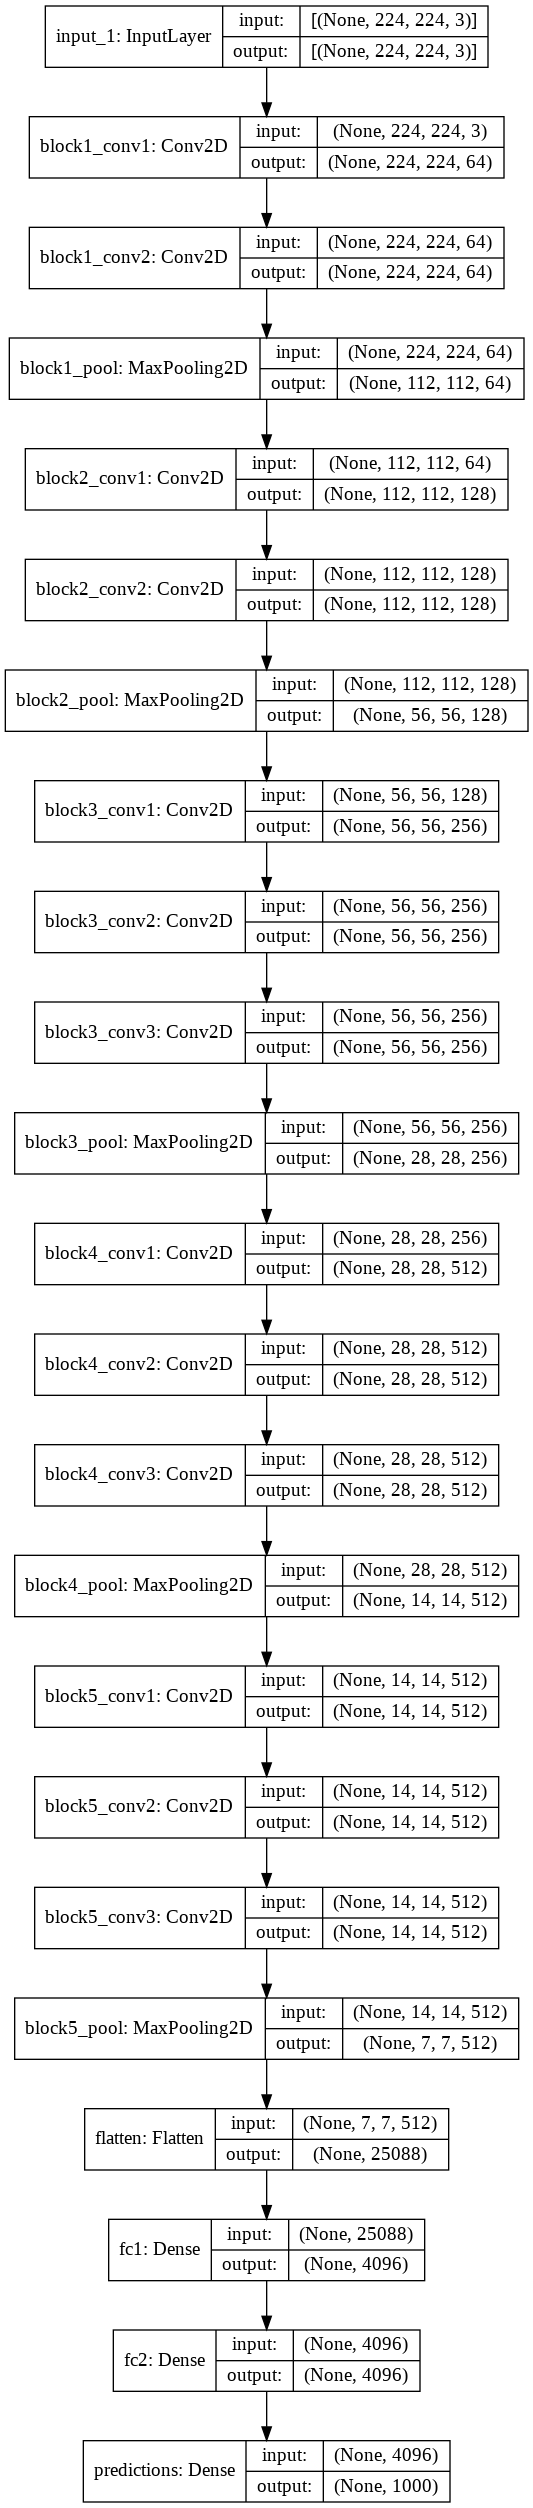

In [ ]:
# Model 구성도 plot
import tensorflow as tf
tf.keras.utils.plot_model(model, to_file='vgg16.png', show_shapes=True, show_layer_names=True)

## 2.3. keras 에서 제공되는 모델들 참고: https://keras.io/applications/

## 2.4. VGG 모델로 MedNIST dataset prediction 해보기

**VGG16**

`keras.applications.vgg16.VGG16(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)`


VGG16 model, with weights pre-trained on ImageNet.

This model can be built both with 'channels_first' data format (channels, height, width) or 'channels_last' data format (height, width, channels).

The default input size for this model is 224x224.

**Arguments**



*   include_top: whether to include the 3 fully-connected layers at the top of the network.
*   weights: one of None (random initialization) or 'imagenet' (pre-training on ImageNet).
*   input_tensor: optional Keras tensor (i.e. output of layers.Input()) to use as image input for the model.
*   input_shape: optional shape tuple, only to be specified if include_top is False (otherwise the input shape has to be (224, 224, 3) (with 'channels_last' data format) or (3, 224, 224) (with 'channels_first' data format). It should have exactly 3 inputs channels, and width and height should be no smaller than 32. E.g. (200, 200, 3) would be one valid value.
*   pooling: Optional pooling mode for feature extraction when include_top is False.
*   classes: optional number of classes to classify images into, only to be specified if include_top is  True, and if no weights argument is specified.

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

# VGG16 모델을 이용해 prediction 하는 함수
def predict_vgg16(model, filename):
    # 이미지 파일을 읽고 화면에 표시
    image = load_img(filename)
    display(image)

    # 모델 사이즈로 이미지 파일을 읽기
    image = load_img(filename, target_size=(224, 224))

    # 이미지 데이터를 numpy로 변환
    image = img_to_array(image)

    # vgg16.preprocess_input()을 호출하기 위해 차원을 조정
    # 보통 모델을 여러 이미지를 한번에 호출. 
    # 맨 앞의 1 : 이미지 갯수가 1개라는 것.
    # 네번째 3 : R, G, B 3개의 channel
    image = image.reshape((1, 224, 224, 3))

    # VGG16 모델 호출을 위해 데이터 전처리.
    # -255 ~ 255 사이 값으로 정규화한다.
    # 그리고 RGB를 BGR순으로 바꾼다.
    image = vgg16.preprocess_input(image)

    # 이미지를 모델에 적용
    yhat = model.predict(image)

    # 모델 적용된 결과를 파싱
    label = vgg16.decode_predictions(yhat)
    
    # 가장 확률이 높은 결과를 획득
    label = label[0][0]

    # 라벨과 라벨을 예측한 확률을 출력
    print('%s (%.2f%%)' % (label[1], label[2]*100))

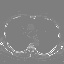

container_ship (24.67%)


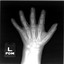

fountain (12.49%)


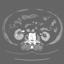

container_ship (19.54%)


In [ ]:
for i in np.random.randint(numTotal, size=3): 
  predict_vgg16(model, imageFilesList[i])

## 2.5. VGG 모델로 MedNIST dataset 학습하기

### 2.5.1. Dataset 나누기
* Train / Validation / Test

In [ ]:
validFrac = 0.2   # Define the fraction of images to move to validation dataset
testFrac = 0.2    # Define the fraction of images to move to test dataset
validList = []
testList = []
trainList = []

for i in range(numTotal):
    rann = np.random.random() # Randomly reassign images
    if rann < validFrac:
        validList.append(i)
    elif rann < testFrac + validFrac:
        testList.append(i)
    else:
        trainList.append(i)
        
nTrain = len(trainList)  # Count the number in each set
nValid = len(validList)
nTest = len(testList)
print("Training images =",nTrain,"Validation =",nValid,"Testing =",nTest)

Training images = 35470 Validation = 11798 Testing = 11686


In [ ]:
validFrac = 0.1   # Define the fraction of images to move to validation dataset
testFrac = 0.1    # Define the fraction of images to move to test dataset
trainFrac = 0.3    # Define the fraction of images to move to train dataset

validList = []
testList = []
trainList = []

for i in range(numTotal):
    rann = np.random.random() # Randomly reassign images
    if rann < validFrac:
        validList.append(i)
    elif rann < testFrac + validFrac:
        testList.append(i)
    elif rann < testFrac + validFrac + trainFrac:
        trainList.append(i)
        
nTrain = len(trainList)  # Count the number in each set
nValid = len(validList)
nTest = len(testList)
print("Training images =",nTrain,"Validation =",nValid,"Testing =",nTest)

Training images = 17675 Validation = 5763 Testing = 5817


In [ ]:
!rm -rf ./train
!rm -rf ./valid
!rm -rf ./test

In [ ]:
!mkdir ./train
!mkdir ./valid
!mkdir ./test

In [ ]:
import shutil
from tqdm import tqdm

for i in tqdm(range(len(trainList))):
  root, clas, src = imageFilesList[trainList[i]].split('/')
  dest = os.path.join('./train',clas,src)
  if not os.path.exists(os.path.join('./train',clas)):
    os.mkdir(os.path.join('./train',clas))
  shutil.copy(imageFilesList[trainList[i]], dest)
  
for i in tqdm(range(len(validList))):
  root, clas, src = imageFilesList[validList[i]].split('/')
  dest = os.path.join('./valid',clas,src)
  if not os.path.exists(os.path.join('./valid',clas)):
    os.mkdir(os.path.join('./valid',clas))
  shutil.copy(imageFilesList[validList[i]], dest)
  
    
for i in tqdm(range(len(testList))):
  root, clas, src = imageFilesList[testList[i]].split('/')
  dest = os.path.join('./test',clas,src)
  if not os.path.exists(os.path.join('./test',clas)):
    os.mkdir(os.path.join('./test',clas))
  shutil.copy(imageFilesList[testList[i]], dest)

100%|██████████| 5817/5817 [00:00<00:00, 8927.59it/s]


### 2.5.2. Image Data Generator 정의

**Keras API - ImageDataGenerator: 일정한 규칙으로 만들어진 폴더구조에서 데이터셋을 자동으로 불러와 학습에 사용할 수 있게 도와주는 API**

![alt text](https://miro.medium.com/max/875/1*HpvpA9pBJXKxaPCl5tKnLg.jpeg)
https://medium.com/@vijayabhaskar96/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_dir = './train'
validation_dir = './valid'
test_dir = './test'
image_size = 224
batch_size = 32

def preprocess_input_vgg(x):
    X = np.expand_dims(x, axis=0)
    X = vgg16.preprocess_input(X)
    return X[0]

# 학습에 사용될 이미지 데이터 생성기
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input_vgg)
 
# 검증에 사용될 이미지 데이터 생성기
validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input_vgg)

# 테스트에 사용될 이미지 데이터 생성기
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input_vgg)

# 학습에 사용될 데이터 생성기  
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_size, image_size),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)

# 검증에 사용될 데이터 생성기
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

# 테스트에 사용될 데이터 생성기
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(image_size, image_size),
        batch_size=1,
        class_mode='categorical',
        shuffle=False)

Found 17675 images belonging to 6 classes.
Found 5763 images belonging to 6 classes.
Found 5817 images belonging to 6 classes.


### 2.5.3. VGG 모델을 MedNIST dataset에 맞게 재구성하기

In [ ]:
# 패키지 불러오기
from keras.applications.vgg16 import VGG16
from keras.layers import Dropout
from keras import optimizers
import keras.backend as K

K.clear_session() # 새로운 세션으로 시작

In [ ]:
# 모델 불러오기
vgg_model = VGG16(weights=None, include_top=False, input_shape=(image_size, image_size, 3))
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
# VGG16모델에 Fully Connected부분을 재구성해서 추가
x = Flatten()(vgg_model.output)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
pred = Dense(numClass, activation='softmax')(x)

model = Model(vgg_model.input, pred)

In [ ]:
# 새로운 모델 요약
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

### 2.5.4. 학습!

In [ ]:
vgg16_model_path = 'vgg16_scratch.h5'

# 모델 컴파일
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# 모델 학습
history = model.fit(
      train_generator,
      steps_per_epoch=50 ,
      epochs=2,
      validation_data=validation_generator,
      validation_steps=25,
      verbose=1)

# 모델 저장
model.save(vgg16_model_path)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/2
50/50 [==============================] - 46s 519ms/step - loss: 1.9905 - acc: 0.4108 - val_loss: 4.5673 - val_acc: 0.0312
Epoch 2/2
50/50 [==============================] - 24s 485ms/step - loss: 0.4849 - acc: 0.9288 - val_loss: 0.1637 - val_acc: 0.9862


### 2.5.5. 학습 결과 시각화

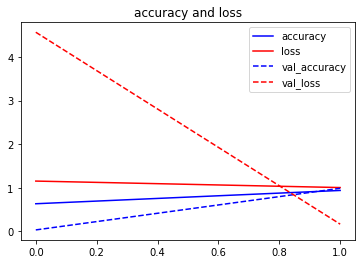

In [ ]:
acc = history.history['acc']
loss = history.history['loss']
valacc = history.history['val_acc']
valloss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='accuracy')
plt.plot(epochs, loss, 'r', label='loss')
plt.plot(epochs, valacc, 'b--', label='val_accuracy')
plt.plot(epochs, valloss, 'r--', label='val_loss')
plt.title('accuracy and loss')
plt.legend()
  
plt.show()

### 2.5.6. 학습된 모델을 이용해 Test 데이터에 대한 Prediction

In [ ]:
import pandas as pd
import seaborn as sn
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# For prediction purposes
y_pred = model.predict_generator(test_generator, steps=test_generator.samples, verbose=1)
y_pred1 = np.argmax(y_pred, axis=1)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


5817/5817 [==============================] - 55s 9ms/step


In [ ]:
# y_test labeling
y_test = test_generator.labels

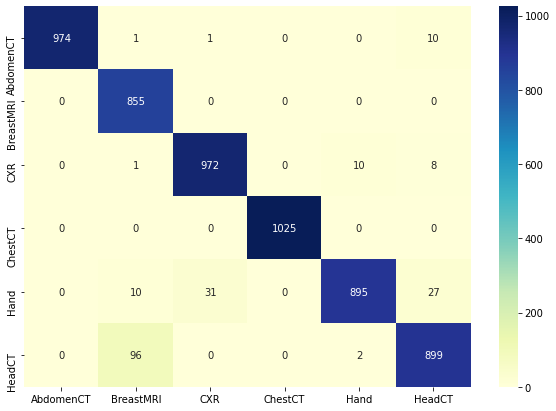

In [ ]:
# calculate confusion matrix for the predicted dataset
cm = confusion_matrix(y_test, y_pred1)

# make a dataframe using cm array
df_cm = pd.DataFrame(cm, index = [i for i in classNames], columns = [i for i in classNames])

# plot confusion matrix
plt.figure(figsize = (10, 7))
sn.heatmap(df_cm, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [ ]:
# classification report generation: precision, recall, f1-score. 
print(classification_report(y_test, y_pred1, target_names=classNames))

              precision    recall  f1-score   support

   AbdomenCT       1.00      0.99      0.99       986
   BreastMRI       0.89      1.00      0.94       855
         CXR       0.97      0.98      0.97       991
     ChestCT       1.00      1.00      1.00      1025
        Hand       0.99      0.93      0.96       963
      HeadCT       0.95      0.90      0.93       997

    accuracy                           0.97      5817
   macro avg       0.97      0.97      0.97      5817
weighted avg       0.97      0.97      0.97      5817



# [3] VGG16를 이용한 분류 실습 (w/ ImageNet pre-trained weight)

### 3.1. VGG16 as a Feature Extractor
![alt text](https://miro.medium.com/max/875/1*W91k18rRAZfJnsM8bhUDXA.png)
https://towardsdatascience.com/a-comprehensive-hands-on-guide-to-transfer-learning-with-real-world-applications-in-deep-learning-212bf3b2f27a

In [ ]:
K.clear_session() # 새로운 세션으로 시작

# 모델 불러오기
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
vgg_model.summary()

# Convolution Layer를 학습되지 않도록 고정 
for layer in vgg_model.layers:
    layer.trainable = False

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
# VGG16모델에 Fully Connected부분을 재구성해서 추가
x = Flatten()(vgg_model.output)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
pred = Dense(numClass, activation='softmax')(x)

model_finetuning = Model(vgg_model.input, pred)

In [ ]:
# 새로운 모델 요약
model_finetuning.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

### 3.2. 학습!

In [ ]:
vgg16_model_path = 'vgg16_finetuning.h5'

# 모델 컴파일
model_finetuning.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# 모델 학습
history = model_finetuning.fit(
      train_generator,
      steps_per_epoch=50 ,
      epochs=2,
      validation_data=validation_generator,
      validation_steps=25,
      verbose=1)

# 모델 저장
model_finetuning.save(vgg16_model_path)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/2
50/50 [==============================] - 12s 219ms/step - loss: 2.2608 - acc: 0.8788 - val_loss: 5.0078e-04 - val_acc: 1.0000
Epoch 2/2
50/50 [==============================] - 11s 214ms/step - loss: 0.0136 - acc: 0.9984 - val_loss: 0.2336 - val_acc: 0.9475


### 3.3. 학습 결과 시각화

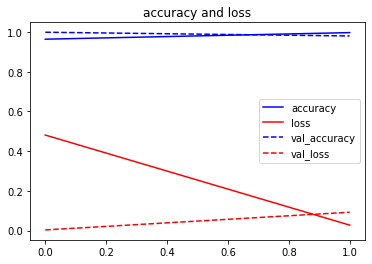

In [ ]:
acc = history.history['acc']
loss = history.history['loss']
valacc = history.history['val_acc']
valloss = history.history['val_loss']

epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='accuracy')
plt.plot(epochs, loss, 'r', label='loss')
plt.plot(epochs, valacc, 'b--', label='val_accuracy')
plt.plot(epochs, valloss, 'r--', label='val_loss')
plt.title('accuracy and loss')
plt.legend()
  
plt.show()

##  3.4. 학습된 모델을 이용해 Test 데이터에 대한 Prediction

In [ ]:
# For prediction purposes
y_pred = model_finetuning.predict_generator(test_generator, steps=test_generator.samples, verbose=1)
y_pred1 = np.argmax(y_pred, axis=1)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


5817/5817 [==============================] - 55s 9ms/step


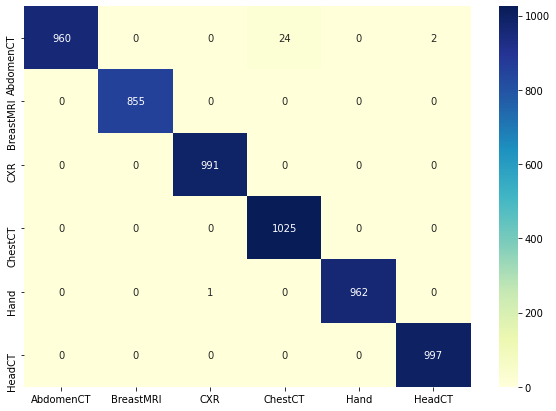

In [ ]:
# calculate confusion matrix for the predicted dataset
cm = confusion_matrix(y_test, y_pred1)

# make a dataframe using cm array
df_cm = pd.DataFrame(cm, index = [i for i in classNames], columns = [i for i in classNames])

# plot confusion matrix
plt.figure(figsize = (10, 7))
sn.heatmap(df_cm, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [ ]:
# classification report generation: precision, recall, f1-score. 
print(classification_report(y_test, y_pred1, target_names=classNames))

              precision    recall  f1-score   support

   AbdomenCT       1.00      0.97      0.99       986
   BreastMRI       1.00      1.00      1.00       855
         CXR       1.00      1.00      1.00       991
     ChestCT       0.98      1.00      0.99      1025
        Hand       1.00      1.00      1.00       963
      HeadCT       1.00      1.00      1.00       997

    accuracy                           1.00      5817
   macro avg       1.00      1.00      1.00      5817
weighted avg       1.00      1.00      1.00      5817



# [4] VGG16를 이용한 분류 실습 (w/ data augmentation)

**Data augmentation: 데이터에 다양한 형태의 변화를 임의로 생성하여 데이터의 갯수와 다양성을 증가시키는 방법**

![Data augmentation](https://miro.medium.com/max/1250/1*rvwzKkvhlDN3Wo_4Oay_4Q.png)
https://medium.com/@thimblot/data-augmentation-boost-your-image-dataset-with-few-lines-of-python-155c2dc1baec

## 4.1. Image Data Generator 정의 (w/ data augmentation)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_dir = './train'
validation_dir = './valid'
test_dir = './test'
image_size = 224
batch_size = 32

def preprocess_input_vgg(x):
    X = np.expand_dims(x, axis=0)
    X = vgg16.preprocess_input(X)
    return X[0]

# 학습에 사용될 이미지 데이터 생성기
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input_vgg,
    #rotation_range=20, # 회전 최대 20도
    width_shift_range=0.2, # 좌우 이동
    height_shift_range=0.2, # 상하 이동
    #horizontal_flip=True, # 좌우 반전
    #vertical_flip=True, # 상하 반전
    )
 
# 검증에 사용될 이미지 데이터 생성기
validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input_vgg)

# 테스트에 사용될 이미지 데이터 생성기
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input_vgg)

# 학습에 사용될 데이터 생성기  
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_size, image_size),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)

# 검증에 사용될 데이터 생성기
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

# 테스트에 사용될 데이터 생성기
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(image_size, image_size),
        batch_size=1,
        class_mode='categorical',
        shuffle=False)

Found 17730 images belonging to 6 classes.
Found 6007 images belonging to 6 classes.
Found 5895 images belonging to 6 classes.


## 4.2. VGG16 ImageNet w/o pre-trained weight

In [ ]:
K.clear_session() # 새로운 세션으로 시작

# 모델 불러오기
vgg_model = VGG16(weights=None, include_top=False, input_shape=(image_size, image_size, 3))

# VGG16모델에 Fully Connected부분을 재구성해서 추가
x = Flatten()(vgg_model.output)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
pred = Dense(numClass, activation='softmax')(x)

model = Model(vgg_model.input, pred)

# 모델 요약
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

## 4.3. 학습!

In [ ]:
vgg16_model_path = 'vgg16_scratch_w_dataaug.h5'

# 모델 컴파일
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# 모델 학습
history = model.fit(
      train_generator,
      steps_per_epoch=50 ,
      epochs=2,
      validation_data=validation_generator,
      validation_steps=25,
      verbose=1)

# 모델 저장
model.save(vgg16_model_path)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/2
50/50 [==============================] - 28s 516ms/step - loss: 2.5522 - acc: 0.3494 - val_loss: 0.0725 - val_acc: 0.9887
Epoch 2/2
50/50 [==============================] - 25s 492ms/step - loss: 0.1443 - acc: 0.9582 - val_loss: 0.0557 - val_acc: 0.9787


## 4.4. 학습 결과 시각화

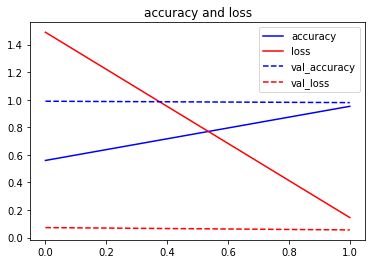

In [ ]:
acc = history.history['acc']
loss = history.history['loss']
valacc = history.history['val_acc']
valloss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='accuracy')
plt.plot(epochs, loss, 'r', label='loss')
plt.plot(epochs, valacc, 'b--', label='val_accuracy')
plt.plot(epochs, valloss, 'r--', label='val_loss')
plt.title('accuracy and loss')
plt.legend()
  
plt.show()

## 4.5. 학습된 모델을 이용해 Test 데이터에 대한 Prediction


In [ ]:
# For prediction purposes
y_pred = model.predict_generator(test_generator, steps=test_generator.samples, verbose=1)
y_pred1 = np.argmax(y_pred, axis=1)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


5817/5817 [==============================] - 55s 9ms/step


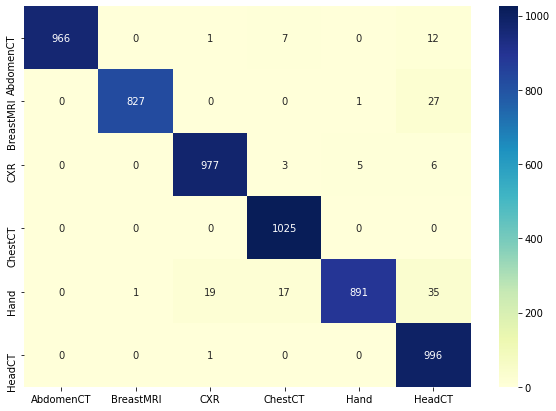

In [ ]:
# calculate confusion matrix for the predicted dataset
cm = confusion_matrix(y_test, y_pred1)

# make a dataframe using cm array
df_cm = pd.DataFrame(cm, index = [i for i in classNames], columns = [i for i in classNames])

# plot confusion matrix
plt.figure(figsize = (10, 7))
sn.heatmap(df_cm, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [ ]:
# classification report generation: precision, recall, f1-score. 
print(classification_report(y_test, y_pred1, target_names=classNames))

              precision    recall  f1-score   support

   AbdomenCT       1.00      0.98      0.99       986
   BreastMRI       1.00      0.97      0.98       855
         CXR       0.98      0.99      0.98       991
     ChestCT       0.97      1.00      0.99      1025
        Hand       0.99      0.93      0.96       963
      HeadCT       0.93      1.00      0.96       997

    accuracy                           0.98      5817
   macro avg       0.98      0.98      0.98      5817
weighted avg       0.98      0.98      0.98      5817



# [5] Model Interpretability with GradCAM

![gradCAM](https://camo.githubusercontent.com/450498bd998fd99d51b647d2b6c8631e94585522/687474703a2f2f692e696d6775722e636f6d2f4a614762645a352e706e67)

**Grad-CAM: Why did you say that? Visual Explanations from Deep Networks via Gradient-based Localization**
Ramprasaath R. Selvaraju, Abhishek Das, Ramakrishna Vedantam, Michael Cogswell, Devi Parikh, Dhruv Batra
https://arxiv.org/abs/1610.02391

**Example: 'Boxer'**

![alt text](https://github.com/PowerOfCreation/keras-grad-cam/raw/master/examples/cat_dog.png) 
![alt text](https://github.com/PowerOfCreation/keras-grad-cam/raw/master/examples/cat_dog_242_gradcam.jpg)
![alt text](https://github.com/PowerOfCreation/keras-grad-cam/raw/master/examples/cat_dog_242_guided_gradcam.jpg)

In [ ]:
import tensorflow as tf
import cv2

In [ ]:
def grad_cam(input_model, image):
    preds = input_model.predict(image)
    predicted_label = np.argmax(preds[0])
    heatmap_model = keras.Model([input_model.inputs], [input_model.get_layer('block5_conv3').output, input_model.output])        
    
    with tf.GradientTape() as tape:
        last_conv_outputs, predictions = heatmap_model(image) # VGG16의 마지막 convolution layer의 특성맵과 예측 벡터
        output = predictions[:, predicted_label]              # 예측 벡터에서 해당 클래스 항목
        
    grads = tape.gradient(output, last_conv_outputs)      # VGG16의 마지막 convolution layer의 특성맵 출력에 대한 해당 클래스의 그래디언트
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))  # 특성맵 채널별 그래디언트 평균값이 담긴 (512,) 크기의 벡터
    
    last_conv_outputs = last_conv_outputs.numpy()[0]
    pooled_grads = pooled_grads.numpy()
    for i, w in enumerate(pooled_grads):                    # 해당 클래스에 대한 채널의 중요도를 특성 맵 배열의 채널에 곱함
        last_conv_outputs[:,:,i] *= w
        
    heatmap = np.mean(last_conv_outputs, axis=-1) # 만들어진 특성 맵에서 채널 축을 따라 평균 --> 해당 클래스의 히트맵
    
    # 히트맵 후처리
    heatmap = np.maximum(heatmap, 0)               
    heatmap /= np.max(heatmap)
    heatmap = cv2.resize(heatmap, (224, 224))

    # 입력 영상을 8-bit RGB 영상으로 변환
    image = image[0, :]
    image -= np.min(image)
    image = np.minimum(image, 255)

    cam = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)
    cam = np.float32(cam) + np.float32(image)
    cam = 255 * cam / np.max(cam)
    
    return np.uint8(cam), heatmap, predicted_label

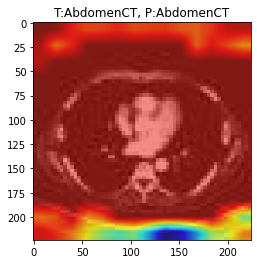

In [ ]:
# Select a random query image+
inum = np.random.randint(numTotal)
qimage0 = load_img(imageFilesList[inum], target_size=(224, 224))
qimage  = img_to_array(qimage0)
qimage  = qimage.reshape((1, 224, 224, 3))
qimage  = vgg16.preprocess_input(qimage)

# CAM 출력
cam, heatmap, plabel = grad_cam(model, qimage)
plt.title('T:'+classNames[imageClass[inum]]+', P:'+classNames[plabel])
plt.imshow(cam)
plt.show()